In [52]:
import torch
import torch.nn.functional as F

In [54]:
# prepare dataset
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])# 0:fail 1:pass

In [56]:
# design model using class(inherit from nn.Module)
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x)) # !!!
        return y_pred

model = LogisticRegressionModel()

In [58]:
# construct loss and optimizer(using PyTorch API)
criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [60]:
# Training Cycle(forward backward updata)
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

0 2.2045135498046875
1 2.2020702362060547
2 2.199641227722168
3 2.197225332260132
4 2.1948211193084717
5 2.1924290657043457
6 2.1900477409362793
7 2.1876769065856934
8 2.1853158473968506
9 2.182964324951172
10 2.18062162399292
11 2.1782877445220947
12 2.175961971282959
13 2.1736438274383545
14 2.1713337898254395
15 2.1690309047698975
16 2.1667346954345703
17 2.164445400238037
18 2.1621627807617188
19 2.159886598587036
20 2.157616138458252
21 2.1553521156311035
22 2.1530935764312744
23 2.1508407592773438
24 2.1485934257507324
25 2.1463515758514404
26 2.1441147327423096
27 2.141883373260498
28 2.1396570205688477
29 2.1374354362487793
30 2.135218620300293
31 2.133007049560547
32 2.1307997703552246
33 2.1285972595214844
34 2.126399517059326
35 2.124206304550171
36 2.1220173835754395
37 2.119832992553711
38 2.1176528930664062
39 2.1154770851135254
40 2.1133060455322266
41 2.1111388206481934
42 2.108975648880005
43 2.1068170070648193
44 2.1046624183654785
45 2.1025116443634033
46 2.100365400

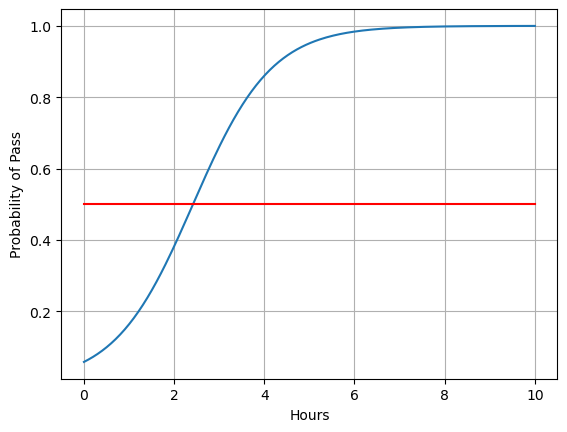

In [62]:
# visualization
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200, 1)) # 类似于numpy.reshape
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()
